## Linear Regression with symbol

This sample constructs a simple linear regression model with symbol.

To caculate the weights and bias of the following formula:

x1*weight1 + x2*weight2 + bias = y

In [29]:
import mxnet as mx
import numpy as np

#### Generate sample data

In [30]:
b = 4
w1 = 3
w2 = 5

sample_number = 100

x1 = np.random.rand(sample_number)
x2 = np.random.rand(sample_number)
noise = np.random.rand(sample_number)

x0_array = mx.nd.ones((sample_number,))
x1_array = mx.nd.array(x1)-0.5
x2_array = mx.nd.array(x2)-0.5
noise_array = mx.nd.array(noise)-0.5

x_data = mx.nd.concat(x0_array, x1_array, x2_array, dim=0).reshape((3,sample_number)).T
y_data = x1_array*w1 + x2_array*w2 + b + noise_array*0.01

x_data[0:3].asnumpy()

array([[ 1.        , -0.30181941, -0.04221582],
       [ 1.        , -0.17424491, -0.17876178],
       [ 1.        ,  0.29947531, -0.3956843 ]], dtype=float32)

#### Construct the model

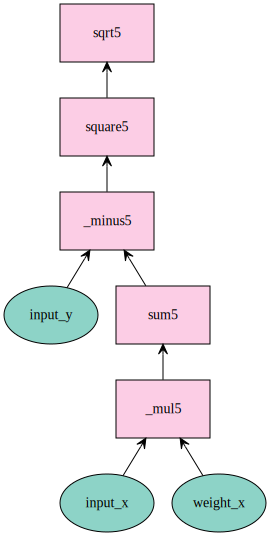

In [31]:

input_x = mx.sym.Variable("input_x")
weight_x = mx.sym.Variable("weight_x")

input_y = mx.sym.Variable("input_y")

multiple_result = input_x * weight_x

sum_result = mx.sym.sum(multiple_result)

lost = mx.sym.sqrt(mx.sym.square(input_y - sum_result))

mx.viz.plot_network(symbol = lost)

#### Create the init weights

weight_x_para is the placeholder of weights and bias

weight_x_g is used to store gradience 

In [32]:
weight_x_para = mx.nd.empty((3,))

weight_x_g = mx.nd.zeros((3,))



#### Train the model

With for loop, we can call the forward and backward function again and again, to caculate the gradience of weights and then udpate the weights

In [33]:

for i in range(0,sample_number-1):
    exe = lost.bind(mx.cpu(), {"input_x":x_data[i],"weight_x":weight_x_para, "input_y":y_data[i]}, \
                args_grad = {'weight_x':weight_x_g})
    result = exe.forward(is_train=True)

    lost_value = result[0].asscalar()
    
    print "lost is",
    print lost_value
        
    exe.backward(result[0])
    
    weight_x_para = weight_x_para - weight_x_g
   
print "weight is: [b, w1, w2]"
print weight_x_para.asnumpy()



lost is 2.88104
lost is 0.475032
lost is 0.738121
lost is 1.1951
lost is 1.06459
lost is 2.34258
lost is 3.14648
lost is 2.34226
lost is 1.82134
lost is 0.543422
lost is 1.89485
lost is 0.829163
lost is 1.19793
lost is 2.58521
lost is 1.25789
lost is 1.69914
lost is 1.43041
lost is 1.22955
lost is 1.53514
lost is 0.105196
lost is 0.216099
lost is 0.138168
lost is 0.221694
lost is 0.361885
lost is 0.427485
lost is 0.239876
lost is 0.160155
lost is 0.24466
lost is 0.237846
lost is 0.29904
lost is 0.156871
lost is 0.12816
lost is 0.153662
lost is 0.136473
lost is 0.0928559
lost is 0.104718
lost is 0.057106
lost is 0.00501347
lost is 0.0704317
lost is 0.109311
lost is 0.034569
lost is 0.00913823
lost is 0.027308
lost is 0.0553069
lost is 0.053231
lost is 0.0415132
lost is 0.0276471
lost is 0.00993085
lost is 0.0426507
lost is 0.0132627
lost is 0.0163829
lost is 0.0107915
lost is 0.0305586
lost is 0.0555677
lost is 0.0614114
lost is 0.0158987
lost is 0.0147086
lost is 0.0170879
lost is 0.00